<a href="https://colab.research.google.com/github/sarahannaford/Capstone-Project-ST1/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import required packages 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read dataset
df = pd.read_csv('//content/drive/MyDrive/Capstone Project/exams.csv')

In [ ]:
# Looking at first 5 and last 5 rows of dataset
df.head()

gender race_ethnicity parent_level_of_education         lunch  \
0  female        group D              some college      standard   
1    male        group D        associate's degree      standard   
2  female        group D              some college  free/reduced   
3    male        group B              some college  free/reduced   
4  female        group D        associate's degree      standard   

  test_prep_course  math_score  reading_score  writing_score  average_score  \
0        completed          59             70             78           69.0   
1             none          96             93             87           92.0   
2             none          57             76             77           70.0   
3             none          70             70             63           67.7   
4             none          83             85             86           84.7   

   pass_npass  
0           1  
1           1  
2           1  
3           1  
4           1

In [ ]:
df.tail()

gender race_ethnicity parent_level_of_education     lunch  \
995    male        group C              some college  standard   
996    male        group C              some college  standard   
997  female        group A               high school  standard   
998    male        group E               high school  standard   
999    male        group D               high school  standard   

    test_prep_course  math_score  reading_score  writing_score  average_score  \
995             none          77             77             71           75.0   
996             none          80             66             66           70.7   
997        completed          67             86             86           79.7   
998             none          80             72             62           71.3   
999             none          58             47             45           50.0   

     pass_npass  
995           1  
996           1  
997           1  
998           1  
999           0

In [ ]:
# Looking at the shape of the dataset
df.shape

(1000, 10)

In [ ]:
# Looking at the names of the columns/attributes
df.columns

Index(['gender', 'race_ethnicity', 'parent_level_of_education', 'lunch',
       'test_prep_course', 'math_score', 'reading_score', 'writing_score',
       'average_score', 'pass_npass'],
      dtype='object')

In [ ]:
# Checking unique values for each attribute 
df.nunique()

gender                         2
race_ethnicity                 5
parent_level_of_education      6
lunch                          2
test_prep_course               2
math_score                    79
reading_score                 71
writing_score                 74
average_score                190
pass_npass                     2
dtype: int64

In [ ]:
# Looking at the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     1000 non-null   object 
 1   race_ethnicity             1000 non-null   object 
 2   parent_level_of_education  1000 non-null   object 
 3   lunch                      1000 non-null   object 
 4   test_prep_course           1000 non-null   object 
 5   math_score                 1000 non-null   int64  
 6   reading_score              1000 non-null   int64  
 7   writing_score              1000 non-null   int64  
 8   average_score              1000 non-null   float64
 9   pass_npass                 1000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


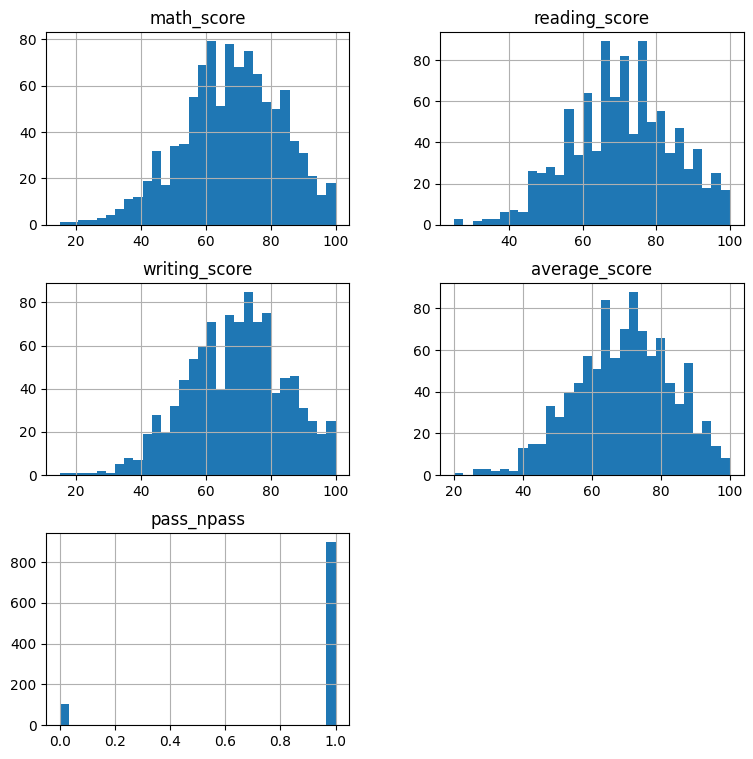

In [ ]:
# Visualising the distribution of data in detail  
fig = plt.figure(figsize = (9,9))
ax = fig.gca()
df.hist(ax = ax,bins = 30)
plt.show()

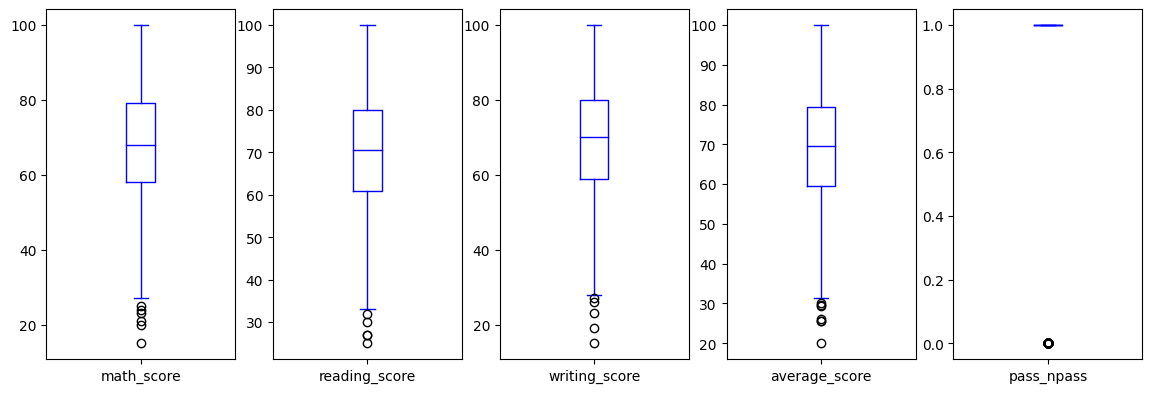

In [ ]:
# Detecting outliers 
df.plot(kind = 'box',
        color = 'blue',
        subplots = True,
        layout = (2, 7),
        figsize = (20, 10),
        sharex = False, sharey = False);

In [ ]:
features = ['math_score', 'reading_score', 'writing_score', 'average_score']
# Removing outliers
def outliers(df_out, drop = False):
  for each_feature in df_out.columns:
    feature_data = df_out[each_feature]
    Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
    Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
    IQR = Q3-Q1 #Interquartile Range
    outlier_step = IQR * 1.5 #That's we were talking about above
    outliers = feature_data[~((feature_data >= Q1 -
    outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
    if not drop:
      print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
    if drop:
      df.drop(outliers, inplace = True, errors = 'ignore')
      print('Outliers from {} feature removed'.format(each_feature))
  outliers(df[features])
  outliers(df[features], drop = True)

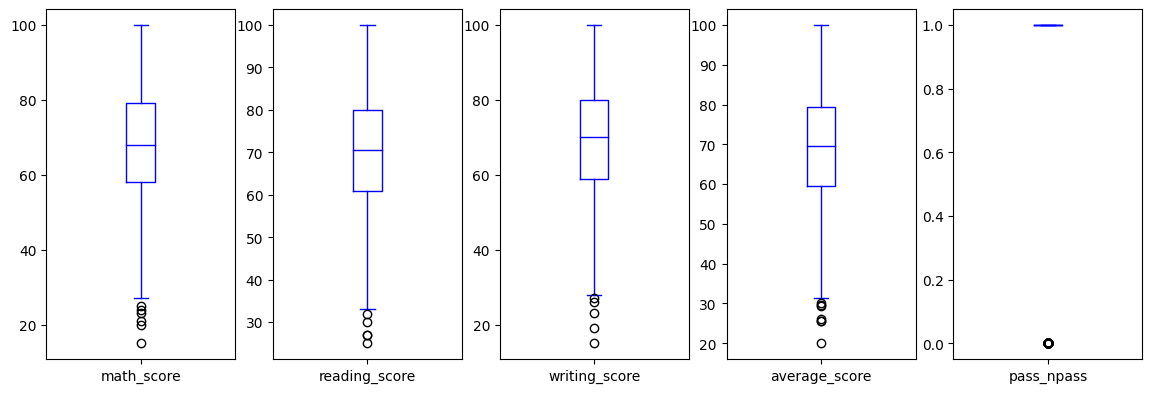

In [ ]:
df.plot(kind='box', subplots=True,
layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='blue');


In [ ]:
# Data Visuliation 
# Statistics of gender ratio in the database
print('Statistic of Gender:' )
df_g = pd.DataFrame(df['gender'].value_counts().reset_index())
df_g.columns = ['Gender', 'Total']
df_g['%'] = (df_g['Total'] / df_g['Total'].sum() * 100).round(2)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3):
    print(df_g)

# Statistics of lunch eaten before test in database 
print('\nStatistic of Lunch:' )
df_l = pd.DataFrame(df['lunch'].value_counts().reset_index())
df_l.columns = ['Lunch', 'Total']
df_l['%'] = (df_l['Total'] / df_l['Total'].sum() * 100).round(2)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3):
    print(df_l)

# Statistics of number of test preparation course completed in database 
print('\nStatistic of Test Preparation Course Completion:' )
df_t = pd.DataFrame(df['test_prep_course'].value_counts().reset_index())
df_t.columns = ['Test Prep Course', 'Total']
df_t['%'] = (df_t['Total'] / df_t['Total'].sum() * 100).round(2)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3):
    print(df_t)

Statistic of Gender:
   Gender  Total     %
0    male    508  50.8
1  female    492  49.2

Statistic of Lunch:
          Lunch  Total     %
0      standard    660  66.0
1  free/reduced    340  34.0

Statistic of Test Preparation Course Completion:
  Test Prep Course  Total     %
0             none    656  65.6
1        completed    344  34.4


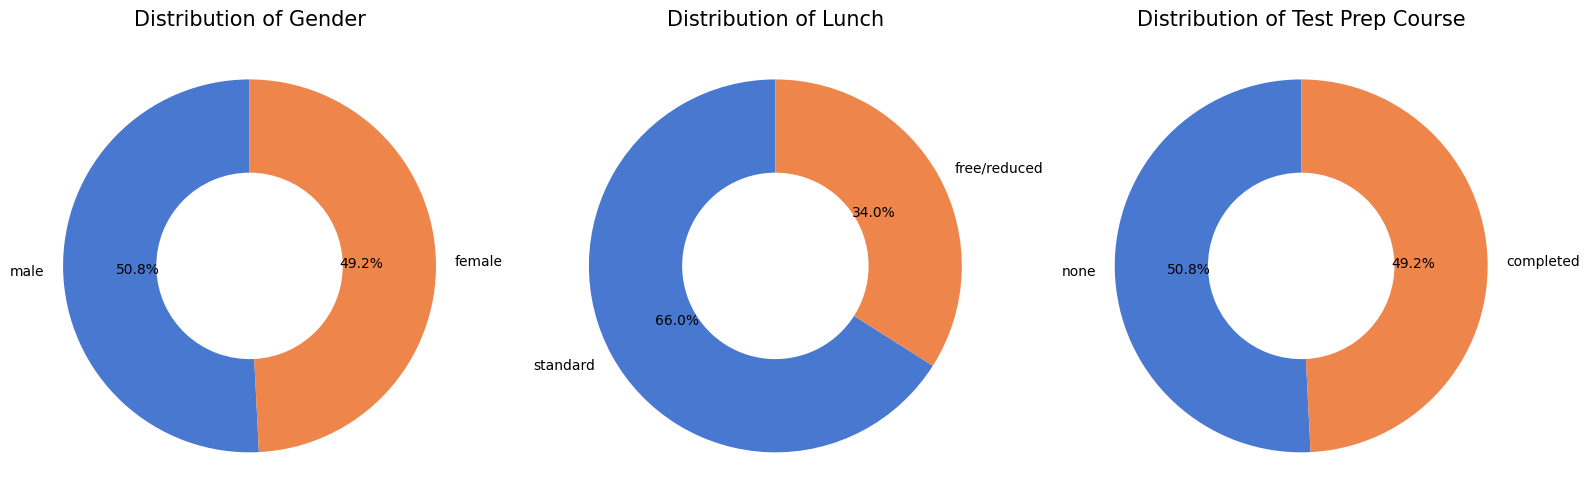

In [ ]:
# Visualising statistics in pie charts
# Colour pallet for pie charts
colors = sns.color_palette('muted')

# Create subplots and figures
fig, axs = plt.subplots(1, 3, figsize = (16, 5))

# Subplot for gender pie chart
axs[0].pie(df_g['%'],
           labels = df_g ['Gender'],
           autopct = '%1.1f%%',
           startangle = 90,
           colors = colors,
           wedgeprops = dict(width = 0.5))
axs[0].axis('equal')
axs[0].set_title('Distribution of Gender', pad = 20, fontsize = 15)

# Subplot for lunch pie chart
axs[1].pie(df_l['%'],
           labels = df_l ['Lunch'],
           autopct = '%1.1f%%',
           startangle = 90,
           colors = colors,
           wedgeprops = dict(width = 0.5))
axs[1].axis('equal')
axs[1].set_title('Distribution of Lunch', pad = 20, fontsize = 15)

# Subplot for test prep course pie chart
axs[2].pie(df_g['%'],
           labels = df_t ['Test Prep Course'],
           autopct = '%1.1f%%',
           startangle = 90,
           colors = colors,
           wedgeprops = dict(width = 0.5))
axs[2].axis('equal')
axs[2].set_title('Distribution of Test Prep Course', pad = 20, fontsize = 15)

plt.tight_layout()
# Display the plot
plt.show()

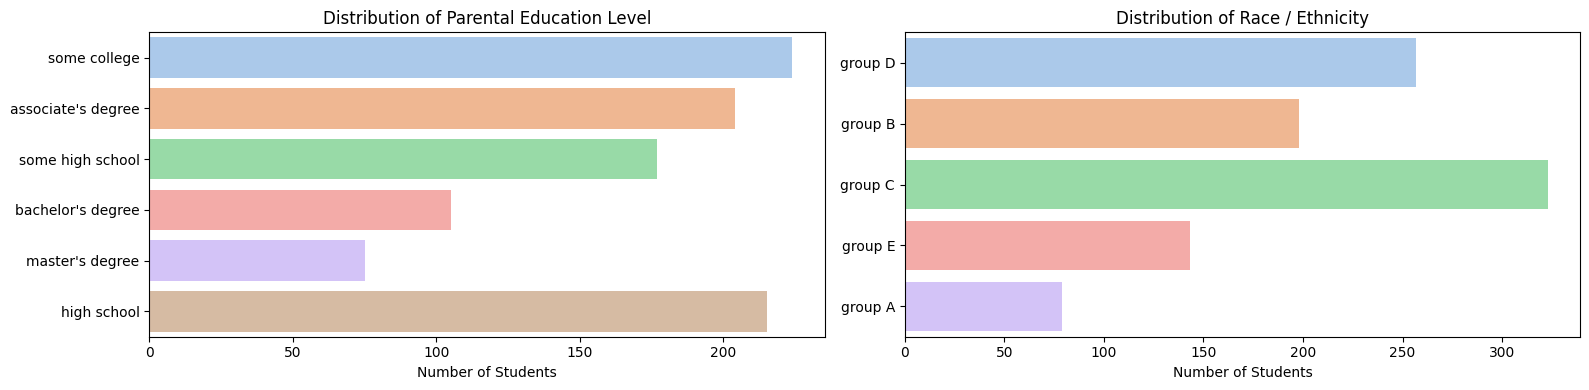

In [ ]:
# Visualising data in bar graphs 

color = sns.color_palette('pastel')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Create the first subplot for the countplot of parental level of education
sns.countplot(y = "parent_level_of_education", data = df, ax = axs[0], palette = color)
axs[0].set_title('Distribution of Parental Education Level')

# Create the second subplot for the countplot of race/ethnicity
sns.countplot(y = "race_ethnicity", data = df, ax = axs[1], palette = color)
axs[1].set_title('Distribution of Race / Ethnicity')

# Set the y-labels for both subplots
axs[0].set_ylabel('')
axs[1].set_ylabel('')

# Set the x-labels for both subplots
axs[0].set_xlabel('Number of Students')
axs[1].set_xlabel('Number of Students')

# Increase the distance between subplots
fig.subplots_adjust(wspace = 0.5)

# Set the tight layout
plt.tight_layout()

# Display the plot
plt.show()

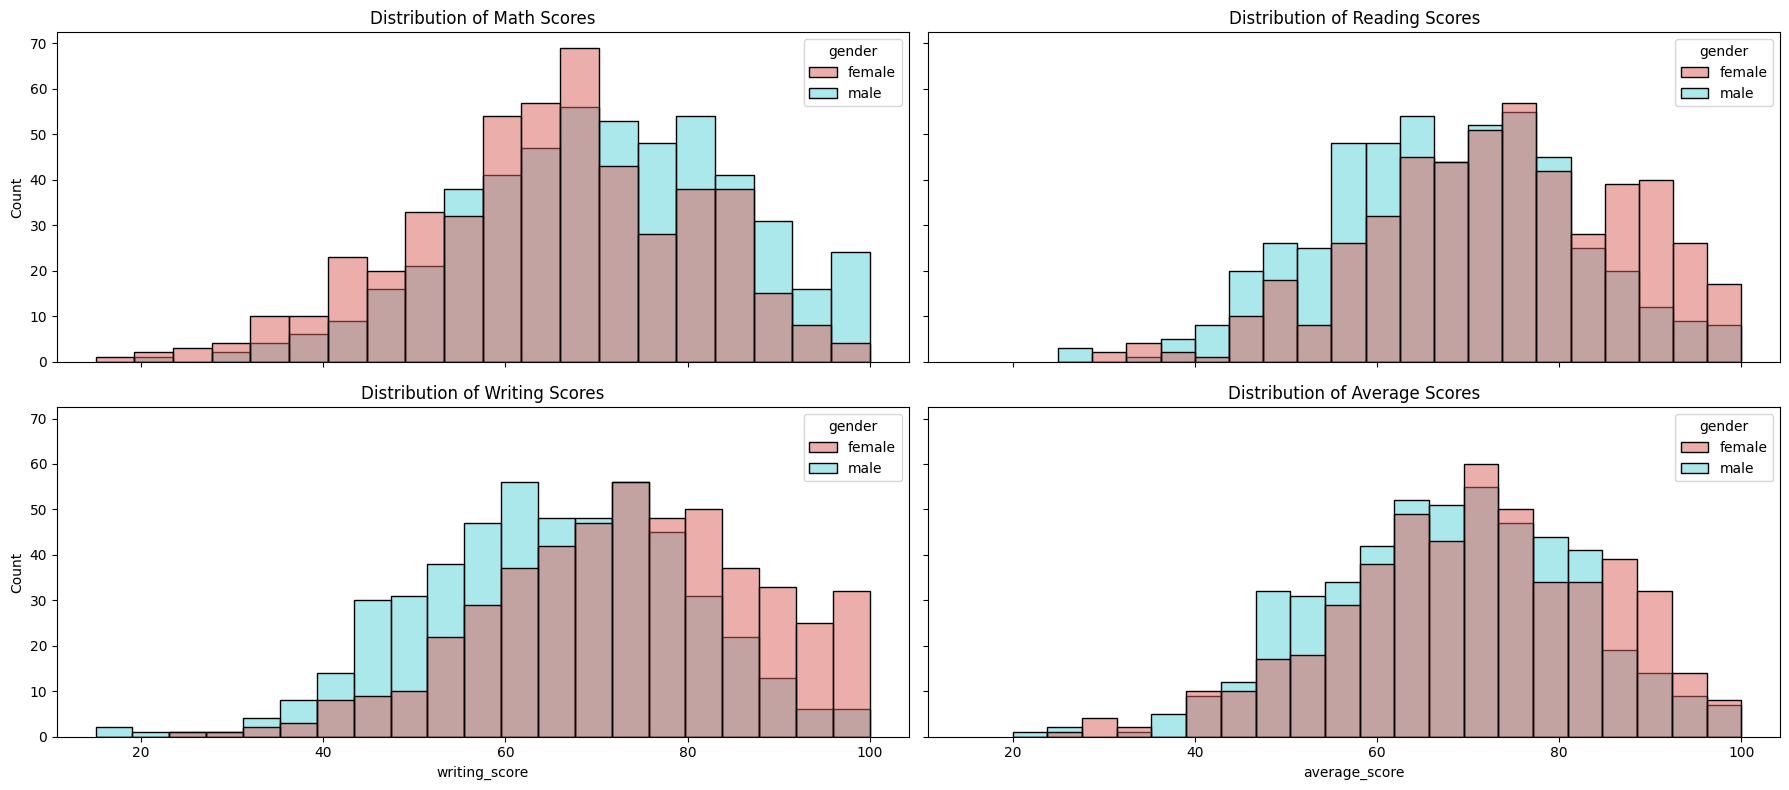

In [ ]:
# Visualising data in graphs 

# Set the color palette
palette = sns.color_palette("hls")

# Create three subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharey = True, sharex = True)

# Create subplot for the distribution of math scores
sns.histplot(x = "math_score", 
             data = df, 
             ax = axs[0, 0],  
             palette = "hls", 
             hue = 'gender')
axs[0, 0].set_title('Distribution of Math Scores')

# Create subplot for the distribution of reading scores
sns.histplot(x = "reading_score", 
             data = df, 
             ax = axs[0, 1],
             palette = "hls", 
             hue = 'gender')
axs[0, 1].set_title('Distribution of Reading Scores')

# Create subplot for the distribution of writing scores
sns.histplot(x = "writing_score", 
             data = df, 
             ax = axs[1, 0], 
             palette = "hls",
             hue = 'gender')
axs[1, 0].set_title('Distribution of Writing Scores')

# Create subplot for the distribution of average scores
sns.histplot(x = "average_score", 
             data = df, 
             ax = axs[1, 1], 
             palette = "hls",
             hue = 'gender')
axs[1, 1].set_title('Distribution of Average Scores')

# Increase the distance between subplots
fig.subplots_adjust(wspace=0.6)

# Set the tight layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df.columns

Index(['gender', 'race_ethnicity', 'parent_level_of_education', 'lunch',
       'test_prep_course', 'math_score', 'reading_score', 'writing_score',
       'average_score', 'pass_npass'],
      dtype='object')

1    898
0    102
Name: pass_npass, dtype: int64


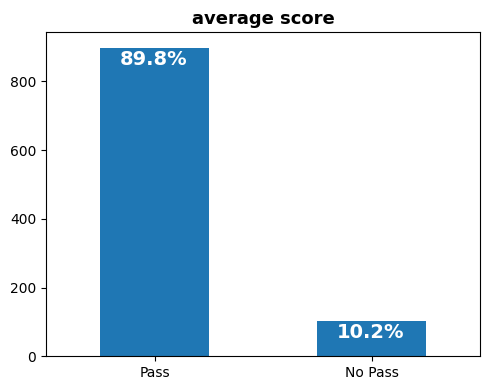

In [ ]:
# Checking target value distribution
print(df.pass_npass.value_counts())
fig, ax = plt.subplots(figsize = (5,4))
name = ["Pass", "No Pass"]
ax = df.pass_npass.value_counts().plot(kind='bar')
ax.set_title("average score", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# Calcualting the percentage 
totals = []
for i in ax.patches:
  totals.append(i.get_height())
  total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.09, i.get_height()-50, \
    str(round((i.get_height()/total)*100, 2))+'%', fontsize=14, color='white', weight = 'bold')
plt.tight_layout()


In [ ]:
# Get the full profiler report 
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.6/22.6 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 31.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345980 sha256=509bc6d1d2e29de8818aabc0b79394b7fd88d580598399e8976e73056ffc414

In [ ]:
# Restarting the kernal
# Re-run the required libraries 
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title = "Student Performance Predicition EDA",
html = {'style':{'full_width':True}})
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Pre-processing the data 
from sklearn.exceptions import DataDimensionalityWarning

# Encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df


gender  race_ethnicity  parent_level_of_education  lunch  \
0       0.0             3.0                        4.0    1.0   
1       1.0             3.0                        0.0    1.0   
2       0.0             3.0                        4.0    0.0   
3       1.0             1.0                        4.0    0.0   
4       0.0             3.0                        0.0    1.0   
..      ...             ...                        ...    ...   
995     1.0             2.0                        4.0    1.0   
996     1.0             2.0                        4.0    1.0   
997     0.0             0.0                        2.0    1.0   
998     1.0             4.0                        2.0    1.0   
999     1.0             3.0                        2.0    1.0   

     test_prep_course  math_score  reading_score  writing_score  \
0                 0.0          59             70             78   
1                 1.0          96             93             87   
2                 1.0          57             76             77   
3                 1.0          70             70             63   
4                 1.0          83             85             86   
..                ...         ...            ...            ...   
995               1.0          77             77             71   
996               1.0          80             66             66   
997               0.0          67             86             86   
998               1.0          80             72             62   
999               1.0          58             47             45   

     average_score  pass_npass  
0             69.0           1  
1             92.0           1  
2             70.0           1  
3             67.7           1  
4             84.7           1  
..             ...         ...  
995           75.0           1  
996           70.7           1  
997           79.7           1  
998           71.3           1  
999           50.0           0  

[1000 rows x 10 columns]

In [ ]:
class_label = df['pass_npass']
df = df.drop(['pass_npass'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['pass_npass'] = class_label
df

gender  race_ethnicity  parent_level_of_education  lunch  \
0       0.0            0.75                        0.8    1.0   
1       1.0            0.75                        0.0    1.0   
2       0.0            0.75                        0.8    0.0   
3       1.0            0.25                        0.8    0.0   
4       0.0            0.75                        0.0    1.0   
..      ...             ...                        ...    ...   
995     1.0            0.50                        0.8    1.0   
996     1.0            0.50                        0.8    1.0   
997     0.0            0.00                        0.4    1.0   
998     1.0            1.00                        0.4    1.0   
999     1.0            0.75                        0.4    1.0   

     test_prep_course  math_score  reading_score  writing_score  \
0                 0.0    0.517647       0.600000       0.741176   
1                 1.0    0.952941       0.906667       0.847059   
2                 1.0    0.494118       0.680000       0.729412   
3                 1.0    0.647059       0.600000       0.564706   
4                 1.0    0.800000       0.800000       0.835294   
..                ...         ...            ...            ...   
995               1.0    0.729412       0.693333       0.658824   
996               1.0    0.764706       0.546667       0.600000   
997               0.0    0.611765       0.813333       0.835294   
998               1.0    0.764706       0.626667       0.552941   
999               1.0    0.505882       0.293333       0.352941   

     average_score  pass_npass  
0          0.61250           1  
1          0.90000           1  
2          0.62500           1  
3          0.59625           1  
4          0.80875           1  
..             ...         ...  
995        0.68750           1  
996        0.63375           1  
997        0.74625           1  
998        0.64125           1  
999        0.37500           0  

[1000 rows x 10 columns]

In [ ]:
df.tail(15)

gender  race_ethnicity  parent_level_of_education  lunch  \
985     0.0            0.00                        0.2    0.0   
986     1.0            0.75                        0.6    1.0   
987     0.0            0.75                        0.6    1.0   
988     1.0            0.75                        1.0    1.0   
989     1.0            0.75                        0.0    1.0   
990     0.0            0.50                        1.0    1.0   
991     0.0            0.00                        0.0    1.0   
992     1.0            0.00                        0.0    0.0   
993     1.0            0.75                        1.0    1.0   
994     0.0            0.25                        0.0    1.0   
995     1.0            0.50                        0.8    1.0   
996     1.0            0.50                        0.8    1.0   
997     0.0            0.00                        0.4    1.0   
998     1.0            1.00                        0.4    1.0   
999     1.0            0.75                        0.4    1.0   

     test_prep_course  math_score  reading_score  writing_score  \
985               1.0    0.588235       0.520000       0.682353   
986               1.0    0.858824       0.626667       0.741176   
987               0.0    0.847059       0.933333       1.000000   
988               1.0    0.423529       0.373333       0.352941   
989               0.0    0.611765       0.493333       0.611765   
990               1.0    0.647059       0.693333       0.717647   
991               1.0    0.670588       0.693333       0.729412   
992               0.0    0.705882       0.560000       0.611765   
993               1.0    0.800000       0.653333       0.764706   
994               1.0    0.788235       0.960000       0.882353   
995               1.0    0.729412       0.693333       0.658824   
996               1.0    0.764706       0.546667       0.600000   
997               0.0    0.611765       0.813333       0.835294   
998               1.0    0.764706       0.626667       0.552941   
999               1.0    0.505882       0.293333       0.352941   

     average_score  pass_npass  
985        0.59125           1  
986        0.74125           1  
987        0.92500           1  
988        0.37125           0  
989        0.56625           1  
990        0.67875           1  
991        0.69125           1  
992        0.62125           1  
993        0.73750           1  
994        0.87125           1  
995        0.68750           1  
996        0.63375           1  
997        0.74625           1  
998        0.64125           1  
999        0.37500           0

In [ ]:
df.columns

Index(['gender', 'race_ethnicity', 'parent_level_of_education', 'lunch',
       'test_prep_course', 'math_score', 'reading_score', 'writing_score',
       'average_score', 'pass_npass'],
      dtype='object')

In [ ]:
# Pre-processing the data 
test_data = df.copy()
le = preprocessing.LabelEncoder()
gender = le.fit_transform(list(test_data["gender"])) # Gender (0.0 = Female, 1.0 = Male)
race_ethnicity = le.fit_transform(list(test_data["race_ethnicity"])) # Race/ethnicity of student (0.00 = Group A, 0.25 = Group B, 0.50 = Group C, 0.75 = Group D, 1.00 = Group A)
parent_education = le.fit_transform(list(test_data["parent_level_of_education"])) # Level of parental education (0.0 = Associate's degree, 0.4 = High school, 0.8 = Some college)
lunch = le.fit_transform(list(test_data["lunch"])) # Lunch (1.0 = standard, 0.0 = free/reduced)
test_prep_course = le.fit_transform(list(test_data["test_prep_course"])) # Test preperation course (0.0 = completed, 1.0 = none)
math_score = le.fit_transform(list(test_data["math_score"]))
reading_score = le.fit_transform(list(test_data["reading_score"]))
writing_score = le.fit_transform(list(test_data["writing_score"]))
average_score = le.fit_transform(list(test_data["average_score"]))

pass_npass = le.fit_transform(list(test_data["pass_npass"])) # Pass (1.0 = Pass, 0.0 = No Pass)

In [ ]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
x = list(zip(gender, race_ethnicity, parent_education, lunch, test_prep_course, math_score, writing_score, 
             average_score))
y = list(pass_npass)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'
# Model Test/Train
# Splitting the data I am trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) 
# Y train is a section of the y array(features)
# The test data will test the accuracy of the model created
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state = seed)

# 20% of the data is split into a test sample 
np.shape(x_train), np.shape(x_test)

((800, 8), (200, 8))

In [ ]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# Evaluation of each model
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

Performance on Training set
NB: 0.967500 (0.008292)

SVM: 0.993750 (0.005590)

GBM: 1.000000 (0.000000)

RF: 0.998750 (0.002500)



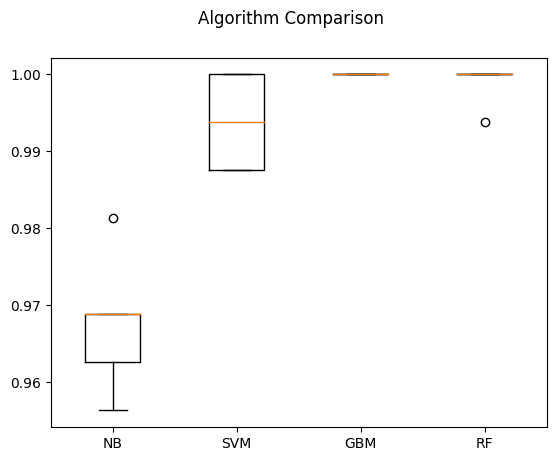

In [ ]:
# Compare Performance of Algorithms using a box plot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Model evaluated by testing with independent test data set
# Make predictions of test data set
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svm = SVC()

best_model = gb
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Accuracy score of best model on test set: ", accuracy_score(y_test, y_pred))

Accuracy score of best model on test set:  1.0


In [ ]:
# Model Performance Evaluation Metric
# 1 - Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       185

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



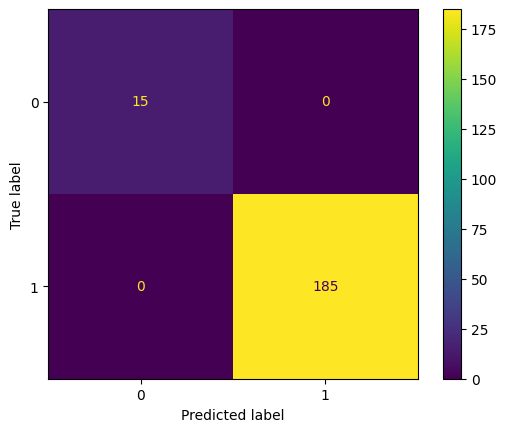

In [ ]:
# 2 - Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

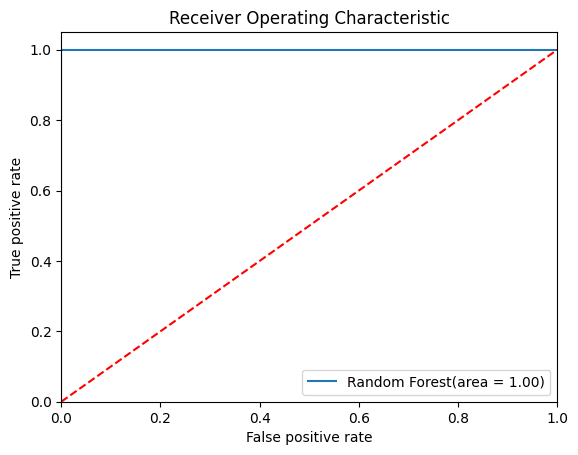

In [ ]:
#3 - ROC-AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
best_model = gb
best_model.fit(x_train, y_train)
gb_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% gb_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()



In [ ]:
# 4 - Prediction Report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

Predicted:  1 Actual:  1 Data:  (0, 0, 5, 0, 1, 25, 27, 54)
Predicted:  0 Actual:  0 Data:  (1, 3, 4, 0, 1, 37, 17, 43)
Predicted:  1 Actual:  1 Data:  (0, 3, 4, 0, 0, 42, 35, 87)
Predicted:  1 Actual:  1 Data:  (0, 3, 1, 0, 1, 51, 56, 136)
Predicted:  1 Actual:  1 Data:  (0, 3, 2, 1, 1, 36, 43, 89)
Predicted:  1 Actual:  1 Data:  (1, 3, 5, 1, 0, 78, 60, 165)
Predicted:  1 Actual:  1 Data:  (0, 3, 4, 1, 0, 59, 69, 169)
Predicted:  1 Actual:  1 Data:  (0, 2, 4, 1, 1, 49, 56, 137)
Predicted:  1 Actual:  1 Data:  (1, 4, 1, 1, 0, 73, 62, 167)
Predicted:  1 Actual:  1 Data:  (0, 1, 4, 1, 0, 39, 55, 113)
Predicted:  1 Actual:  1 Data:  (1, 3, 0, 1, 0, 77, 61, 166)
Predicted:  1 Actual:  1 Data:  (0, 3, 4, 1, 1, 52, 46, 121)
Predicted:  1 Actual:  1 Data:  (0, 3, 5, 1, 1, 40, 38, 90)
Predicted:  1 Actual:  1 Data:  (0, 3, 2, 0, 1, 46, 44, 107)
Predicted:  0 Actual:  0 Data:  (0, 2, 5, 1, 1, 31, 22, 45)
Predicted:  1 Actual:  1 Data:  (1, 3, 1, 1, 1, 41, 31, 81)
Predicted:  1 Actual:  1 Data: 